In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipyleaflet
import datetime

# Data Project: Chigago Taxi Set

## Erste Schritte
Mache dich mit der Struktur des Datensets vertraut. Öffne das Datenset <font color='orange'>bigdata/chigago/chigago.csv</font> und untersuche das Datenset mit den gelernten Methoden. Eine Kurzbeschreibung findest du unter im gleichen Ordner <font color='orange'>chigago_columns.txt</font>.

In [35]:
df = pd.read_csv('../../src/bigdata/chicago-taxi-trips/chicago_taxi_trips_2016_01.csv')
df.head()

,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,85.00,2016-1-13 06:15:00,2016-1-13 06:15:00,180.00,0.40,nan,nan,24.00,24.00,4.50,0.00,0.00,0.00,4.50,Cash,107.00,199.00,510.00,199.00,510.00
1,2776.00,2016-1-22 09:30:00,2016-1-22 09:45:00,240.00,0.70,nan,nan,nan,nan,4.45,4.45,0.00,0.00,8.90,Credit Card,nan,nan,nan,nan,nan
2,3168.00,2016-1-31 21:30:00,2016-1-31 21:30:00,0.00,0.00,nan,nan,nan,nan,42.75,5.00,0.00,0.00,47.75,Credit Card,119.00,nan,nan,nan,nan
3,4237.00,2016-1-23 17:30:00,2016-1-23 17:30:00,480.00,1.10,nan,nan,6.00,6.00,7.00,0.00,0.00,0.00,7.00,Cash,nan,686.00,500.00,686.00,500.00
4,5710.00,2016-1-14 05:45:00,2016-1-14 06:00:00,480.00,2.71,nan,nan,32.00,nan,10.25,0.00,0.00,0.00,10.25,Cash,nan,385.00,478.00,nan,nan


## Hinzufügen von Taxiunternehmen, Long und Lat
Die Informationen von Longitude und Latitude sind im Moment normalisiert. Das heißt wir müssen die Daten aus einer anderen Quelle erst verknüpfen. Wir brauchen für die weitere Auswertung nur die 'pickup' Koordinaten.

**Die Dateien liegen als .json Datei vor. Auch JSON Dateien können mit Pandas importiert werden:**

Für Longitude Latitude ist es notwendig den dtype auf float zu setzen, da sonst PANDAS denkt, es handle sich um ein Datum. Außerdem müssen wir für einen merge zwischen einem DataFrame und eine Series sicherstellen, das dieses einen Namen (dieser wird zum Spaltennamen) hat.

```python
s_beispiel = pd.read_json(<path to source>, typ='series', dtype='float')
s_beispiel.name = 'beispiel' 
```

Desweiteren wollen wir die Namen der Taxiunternehmen auf die selbe Weise importieren und verknüpfen.
<hr>

***Tipp: Alle Dateien befinden sich im Ordner Abschlussuebung***

In [36]:
# Prüfen ob der DataFrame vorher genauso lang ist wie nacher
len(df)

1705805

In [37]:
s_long_pick = pd.read_json('pickup_longitude.json', typ='series', dtype='float')
s_long_pick.name = 'pickup_longitude_clean'
df = pd.merge(df, s_long_pick, how='left', left_on=['pickup_longitude'], right_index=True)

In [38]:
s_lat_pick = pd.read_json('pickup_latitude.json', typ='series', dtype='float')
s_lat_pick.name = 'pickup_latitude_clean'
df = pd.merge(df, s_lat_pick, how='left', left_on=['pickup_latitude'], right_index=True)

In [39]:
s_company = pd.read_json('company.json', typ='series', dtype='float')
s_company.name = 'company_clean'
df = pd.merge(df, s_company, how='left', left_on=['company'], right_index=True)

In [40]:
len(df)

1705805

## Bereinigen des DataFrames
Im Laufe der Bearbeitung werden Sie einige Fehler in den Datensets finden. Bereinigen Sie diese am besten direkt nach dem importieren. 

## Allgemeine Informationen
* Schaue dir die Werteverteilung des DataFrames mit ``.describe()`` an um einen Überblick zu erhalten. Sollten die Zahlen nur in Wissenschaftlicher Schreibweise erscheinen schreibe in eine Zeile vorher: ``pd.options.display.float_format = '{:.2f}'.format`` um die Ausgabe von Pandas zu formatieren.
* Wie viel unterschiedliche Taxifahrer gibt es in der Stadt?
* Wie viele Taxiunternehmen gibt es und wie viele Taxifahrten wurden von den verschiedenen Taxis für die Unternehmen durchgeführt

**Werteverteilung**

In [41]:
# Finden Sie Extremwerte und filtern Sie diese ,soweit du sie schon erkennen kannst, heraus.
pd.options.display.float_format = '{:.2f}'.format
df.describe()

,taxi_id,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,company,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,pickup_longitude_clean,pickup_latitude_clean
count,1705782.00,1705491.00,1705791.00,0.00,967479.00,1420016.00,1392150.00,1705772.00,1705772.00,1705772.00,1705772.00,1705772.00,1073079.00,1420048.00,1420048.00,1394123.00,1394123.00,1420048.00,1420048.00
mean,4389.32,653.44,2.87,nan,516.82,23.22,20.99,13.15,1.52,0.00,0.95,15.62,92.60,392.14,437.77,401.31,438.85,-87.66,41.90
std,2515.82,932.73,18.11,nan,357.59,19.82,17.37,32.87,2.74,0.84,25.60,42.72,34.14,252.77,194.89,254.42,202.30,0.07,0.04
min,0.00,0.00,0.00,nan,2.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,1.00,0.00,1.00,-87.91,41.66
25%,2242.00,240.00,0.00,nan,225.00,8.00,8.00,6.00,0.00,0.00,0.00,7.00,101.00,170.00,288.00,173.00,270.00,-87.66,41.88
50%,4386.00,480.00,1.00,nan,504.00,22.00,15.00,8.00,0.00,0.00,0.00,9.50,107.00,399.00,478.00,411.00,478.00,-87.63,41.89
75%,6591.00,840.00,2.40,nan,807.00,32.00,32.00,13.50,2.00,0.00,1.00,15.30,107.00,618.00,610.00,666.00,610.00,-87.63,41.91
max,8762.00,86340.00,3280.00,nan,1140.00,77.00,77.00,9002.29,450.00,999.99,9993.41,9997.16,119.00,784.00,785.00,784.00,785.00,-87.53,42.02


**Wie viele verschiedene Taxifahrer gibt es in der Stadt**

In [42]:
len(df['taxi_id'].unique())

5637

**Wie viele Taxiunternehmen gibt es und wie viele Taxifahrten wurden von den verschiedenen Taxis für die Unternehmen durchgeführt**

In [43]:
df.groupby(['company_clean', 'taxi_id']).size().head()

company_clean                    taxi_id
0694 - 59280 Chinesco Trans Inc  593.00     284
1085 - 72312 N and W Cab Co      7579.00    267
1247 - 72807 Daniel Ayertey      8088.00    249
2092 - 61288 Sbeih company       3762.00    276
2192 - 73487 Zeymane Corp        6840.00    273
dtype: int64

## Ergänzen der Informationen
* Berechnen Sie die Gesamtkosten einer Fahrt und speichern Sie diese in einer Spalte mit dem Namen **trip_total**. <br>**Zusatz**: *Der Elegantere Weg nutzt die ``.sum()`` Funktion. Informieren Sie sich darüber was der ``axis=1`` der Parameter der ``.sum()`` Funktion bewirkt.*
* Stellen Sie die Verteilung der Gesamteinnahmen als Boxplot und Violinplot dar
* Berechnen Sie aus der Zeit und der Distanz die durchschnittliche Geschwindigkeit und speichern Sie diese iner einer neuen Spalte mit dem Namen **velo**
* Untersuchen Sie die Grenzwerte der neu berechneten Spalten

**Gesamtkosten**

In [44]:
df['trip_total'] = df['fare'] + df['tips'] + df['tolls'] + df['extras']

In [45]:
# Zusatzübung
df['trip_total'] = df[['fare', 'tips', 'tolls', 'extras']].sum(axis=1)

**Gesamteinnahmen als Boxplot und Violinplot**

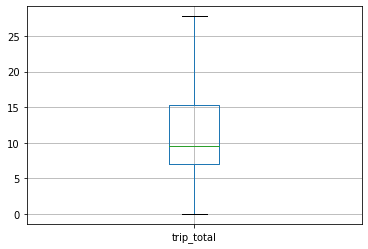

In [46]:
# Boxplot 
df.boxplot(['trip_total'], showfliers=False)

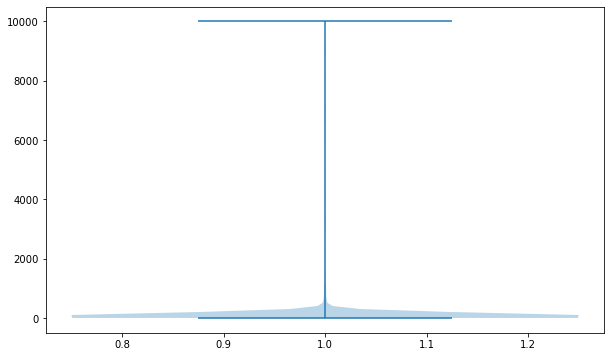

In [47]:
# Violinplot 
fig, ax = plt.subplots(figsize=(10, 6))

# Konvertieren der Serie in listen, da pyplot keine Serien unterstützt
w = df['trip_total'].dropna().drop_duplicates().tolist()

data=[w]

ax.violinplot(data)
plt.show()

**Geschwindigkeit**

In [48]:
df['velo'] = df['trip_miles']/(df['trip_seconds']/3600)

**Untersuchung und Bereinigung**

In [49]:
df['velo'].describe()

count   1522486.00
mean           inf
std            nan
min           0.00
25%           2.35
50%          10.29
75%          15.92
max            inf
Name: velo, dtype: float64

In [50]:
# Ab diesen Zeitpunkt arbeiten wir mit der Geschwindigkeit. 
# Daher müssen alle unrealistischen Werte entfernt werden.
df = df.dropna(subset=['velo'])

In [51]:
# 9997 Dollar für einen Taxitrip sind eher unwahrscheinlich. Solche Fahrten müssen überprüft werden.
df['trip_total'].describe()

count   1522486.00
mean         15.36
std          41.91
min           0.00
25%           7.00
50%           9.50
75%          15.00
max        9997.16
Name: trip_total, dtype: float64

In [52]:
# Wir setzen hier eine geschätze Grenze von 2000 für trip_total.
df = df[df['trip_total'] < 2000]

# Map Visualisation mit Leaflet

Wenn wir Datenpunkte auf einer Karte darstellen möchten, können wir die Bibliothek ipyleaflet benutzten.

## Konvertieren von Spalten in eine Liste
Zunächst müssen wir allerdings lernen, wie man die Daten aus einem DataFrame in eine Liste umwandelt. Wir  möchten jetzt eine oder mehrer Spalten in eine Liste konvertieren in der keine NaN vorkommt.Wir erreichen dies mit dem folgenden Vorgehen:

``df[['col_a', 'col_b',..].dropna().values.tolist()``

Als Ergebnis sollten wir eine verschachtelte Liste erhalten:

``[[.., .. ,..], ... ,[.., .. ,..]]``

Probiere die Spalten eine Liste zu erzeugen die nur die Werte der Spalten **'pickup_latitude_clean'**, **'pickup_longitude_clean'** enthält.

In [53]:
lat_lon = df[['pickup_latitude_clean', 'pickup_longitude_clean']].dropna().values.tolist()
lat_lon

[[41.901206994, -87.676355989],
 [41.944226601, -87.655998182],
 [41.878865584, -87.625192142],
 [41.899602111, -87.633308037],
 [41.953582125, -87.72345239],
 [41.892507781, -87.626214906],
 [41.898331794, -87.620762865],
 [41.89321636, -87.63784421],
 [41.878865584, -87.625192142],
 [41.89321636, -87.63784421],
 [41.794090253, -87.592310855],
 [41.914747305, -87.654007029],
 [41.914616286, -87.631717366],
 [41.874005383, -87.66351755],
 [41.892507781, -87.626214906],
 [41.89503345, -87.619710672],
 [41.880994471, -87.632746489],
 [41.892042136, -87.63186395],
 [41.880994471, -87.632746489],
 [41.890922026, -87.618868355],
 [41.899602111, -87.633308037],
 [41.890922026, -87.618868355],
 [41.892042136, -87.63186395],
 [41.794090253, -87.592310855],
 [41.899602111, -87.633308037],
 [41.878865584, -87.625192142],
 [41.900221297, -87.629105186],
 [41.892507781, -87.626214906],
 [41.877406123, -87.621971652],
 [41.877406123, -87.621971652],
 [41.892507781, -87.626214906],
 [41.884987192, -

# iypleaflet - Daten auf Karten

Probiere dich an den folgenden beiden Beispiele und versuche diese anzuwenden:
* Heatmap: https://ipyleaflet.readthedocs.io/en/latest/api_reference/heatmap.html
* Marker Cluster: https://ipyleaflet.readthedocs.io/en/latest/api_reference/marker_cluster.html

* **Zusatz**: *Radius der Heatmap mit Schieberegeler einstellen*

**Tipps**: Das Zentrum von Chicago hat folgende Koordinaten (41.87,-87.62). Als Zoomstufe hat sich 8 als guter Startwert herausgestellt. 


**Heatmap mit Leaflet**

In [67]:
m = ipyleaflet.Map(center=(41.87,-87.62), zoom=10)


heatmap = ipyleaflet.Heatmap(
    locations=lat_lon,
    radius=25
)

m.add_layer(heatmap);
m

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

**Marker Cluster** <br>
Benutze die untenstehende Funktion um die Marker für das MarkerCluster zu erstellen. Du kannst als Parameter Size angeben, also wie viele Punkte aus dem Datenset verwendet werden sollen. Taste dich **vorsichtig heran, eine ``size>500`` solltest du nicht wählen.

In [55]:
# Transformationsfunktion
def to_marker(lat_lon, size=50):
    m = []
    
    for x in lat_lon[:size]:
        m.append(ipyleaflet.Marker(location=list(x)))
    return m

In [56]:
m = ipyleaflet.Map(center=(41.87,-87.62), zoom=10)
    
marker_list = to_marker(lat_lon)
    
marker_cluster = ipyleaflet.MarkerCluster(
    markers=marker_list
)

m.add_layer(marker_cluster);
m

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

# Auswertungen

## Zeitliche Auswertungen
* Erstelle eine Spalte Tag und Uhrzeit. Zähle die Fahrten pro Tag im Monat und sortiere diese absteigend nach der Anzahl der Fahrten
* Erstelle eine Plot eines Tages. 
<br>**Tipp:** Einen Tag als Datetime erstellst du mit ``datetime.date()``. Resample außerdem die Daten auf 1h Intervalle und berechne die Anzahl der Fahrten in diesem Zeitraum.

* Erstelle eine Plot mit 3 Subplots in dem die Fahrten pro Tag, die Einnahmen pro Tag und die zurückgelegten Kilometer pro Tag analyisiert werden.

In [57]:
df.head()

,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,...,payment_type,company,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,pickup_longitude_clean,pickup_latitude_clean,company_clean,velo
0,85.00,2016-1-13 06:15:00,2016-1-13 06:15:00,180.00,0.40,nan,nan,24.00,24.00,4.50,...,Cash,107.00,199.00,510.00,199.00,510.00,-87.68,41.90,Taxi Affiliation Services,8.00
1,2776.00,2016-1-22 09:30:00,2016-1-22 09:45:00,240.00,0.70,nan,nan,nan,nan,4.45,...,Credit Card,nan,nan,nan,nan,nan,nan,nan,NaN,10.50
3,4237.00,2016-1-23 17:30:00,2016-1-23 17:30:00,480.00,1.10,nan,nan,6.00,6.00,7.00,...,Cash,nan,686.00,500.00,686.00,500.00,-87.66,41.94,NaN,8.25
4,5710.00,2016-1-14 05:45:00,2016-1-14 06:00:00,480.00,2.71,nan,nan,32.00,nan,10.25,...,Cash,nan,385.00,478.00,nan,nan,-87.63,41.88,NaN,20.32
5,1987.00,2016-1-8 18:15:00,2016-1-8 18:45:00,1080.00,6.20,nan,nan,8.00,3.00,17.75,...,Cash,nan,599.00,346.00,660.00,120.00,-87.63,41.90,NaN,20.67


**Erstelle eine Spalte Tag und Uhrzeit**

In [58]:
df['Day'] = pd.to_datetime(df['trip_start_timestamp'])
df['Day'] = df['Day'].dt.date
df['Day'].head()

0    2016-01-13
1    2016-01-22
3    2016-01-23
4    2016-01-14
5    2016-01-08
Name: Day, dtype: object

In [59]:
df['Time'] = pd.to_datetime(df['trip_start_timestamp'])
df['Time'] = df['Time'].dt.time
df['Time'].head()

0    06:15:00
1    09:30:00
3    17:30:00
4    05:45:00
5    18:15:00
Name: Time, dtype: object

**Fahrten pro Tag im Monat, absteigend nach der Anzahl sortiert**

In [60]:
df.groupby('Day').size().sort_values(ascending=False)

Day
2016-01-15    61369
2016-01-22    60730
2016-01-01    59111
2016-01-29    58432
2016-01-21    57142
2016-01-08    56987
2016-01-13    55676
2016-01-28    54834
2016-01-20    54360
2016-01-14    54264
2016-01-12    53203
2016-01-19    52341
2016-01-16    51753
2016-01-27    51005
2016-01-11    50300
2016-01-26    48836
2016-01-23    48475
2016-01-07    48167
2016-01-25    46981
2016-01-06    46195
2016-01-09    46167
2016-01-17    45387
2016-01-30    44692
2016-01-05    43729
2016-01-02    42001
2016-01-04    41090
2016-01-18    39982
2016-01-24    38869
2016-01-10    38648
2016-01-31    36384
2016-01-03    35312
dtype: int64

**Erstelle eine Plot eines Tages**

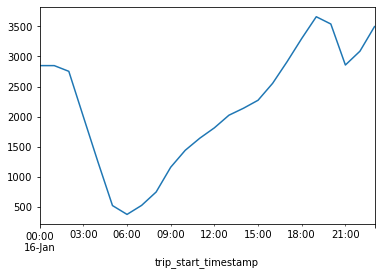

In [61]:
df_day = df[df['Day'] == datetime.date(2016, 1, 16)].copy()
df_day['trip_start_timestamp'] = pd.to_datetime(df_day['trip_start_timestamp'])
df_day.resample('1h', on='trip_start_timestamp').size().plot()

**3 Subplots in dem die Fahrten pro Tag, die Einnahmen pro Tag und die zurückgelegten Kilometer pro Tag**

In [62]:
df.columns

Index(['taxi_id', 'trip_start_timestamp', 'trip_end_timestamp', 'trip_seconds',
       'trip_miles', 'pickup_census_tract', 'dropoff_census_tract',
       'pickup_community_area', 'dropoff_community_area', 'fare', 'tips',
       'tolls', 'extras', 'trip_total', 'payment_type', 'company',
       'pickup_latitude', 'pickup_longitude', 'dropoff_latitude',
       'dropoff_longitude', 'pickup_longitude_clean', 'pickup_latitude_clean',
       'company_clean', 'velo', 'Day', 'Time'],
      dtype='object')

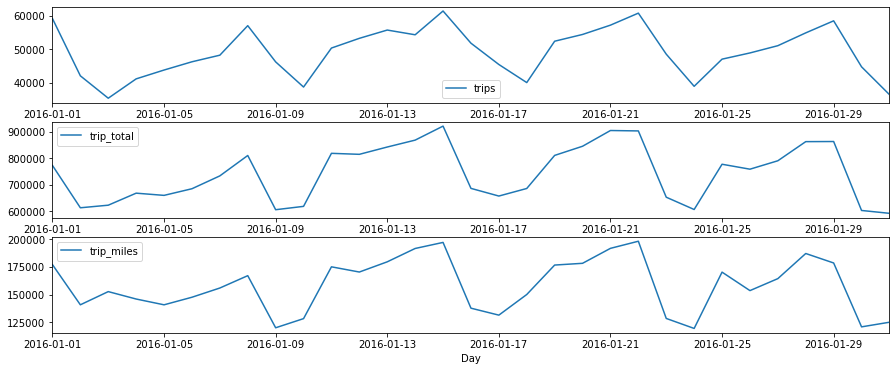

In [63]:
s_p_d = df[['Day']].groupby('Day').size()
s_p_d.name = 'trips'
s_p_d = s_p_d.to_frame()

s_tt_d = df[['Day', 'trip_total']].groupby('Day').sum()
s_km_d = df[['Day', 'trip_miles']].groupby('Day').sum()

fig, ax = plt.subplots(3,1, figsize=(15, 6))
s_p_d.plot(ax=ax[0])
s_tt_d.plot(ax=ax[1])
s_km_d.plot(ax=ax[2])

## Companys
* Lass dir die Companys und Ihrer Fahrer nach den Umsätzen der einzelnen Fahrer sortiert ausgeben
* Berechne außerdem wie profitable die Fahrer waren, also wie viel Geld diese im Schnitt pro Kilometer eingenommen haben (inkl. Trinkgeld etc.)

**Companys (aufsteigend) und Ihrer Fahrer nach den Umsätzen der einzelnen Fahrer sortiert (absteigend) ausgeben**

In [64]:
df_company_earning = df.groupby(['company_clean', 'taxi_id'])['trip_total'].sum().reset_index()
df_company_earning.sort_values(['company_clean', 'trip_total'], ascending=[True, False]).head()

,company_clean,taxi_id,trip_total
0,0694 - 59280 Chinesco Trans Inc,593.00,3898.55
1,1085 - 72312 N and W Cab Co,7579.00,2796.48
2,1247 - 72807 Daniel Ayertey,8088.00,3329.21
3,2092 - 61288 Sbeih company,3762.00,4906.40
4,2192 - 73487 Zeymane Corp,6840.00,3589.80


**Profitabilität der Fahrer**

In [65]:
df_company_earning = df.groupby(['company_clean', 'taxi_id'])['trip_total', 'trip_miles'].sum().reset_index()
df_company_earning['earnings_per_miles'] = df_company_earning['trip_total']/df_company_earning['trip_miles']
df_company_earning.sort_values('earnings_per_miles', ascending=False).head()

,company_clean,taxi_id,trip_total,trip_miles,earnings_per_miles
548,Chicago Elite Cab Corp. (Chicago Carriag,5880.00,3.25,0.00,inf
583,Chicago Elite Cab Corp. (Chicago Carriag,6566.00,89.05,0.00,inf
586,Chicago Elite Cab Corp. (Chicago Carriag,6607.00,72.35,0.00,inf
587,Chicago Elite Cab Corp. (Chicago Carriag,6625.00,976.00,0.00,inf
588,Chicago Elite Cab Corp. (Chicago Carriag,6648.00,23.00,0.00,inf


In [66]:
# ignorieren der Fehlerhaften inf Werte
df_company_earning[df_company_earning['trip_miles'] != 0].sort_values('earnings_per_miles', ascending=False).head()

,company_clean,taxi_id,trip_total,trip_miles,earnings_per_miles
2245,Taxi Affiliation Services,4470.00,3794.30,0.10,37943.00
1909,Taxi Affiliation Services,1760.00,6367.16,7.30,872.21
2782,Taxi Affiliation Services,8568.00,4899.70,6.40,765.58
2485,Taxi Affiliation Services,6343.00,6479.69,9.50,682.07
2315,Taxi Affiliation Services,4964.00,5767.11,9.60,600.74


# Weitere Möglichkeiten der Datenanalyse
Das Datenset bietet viele Möglichkeiten weitere Sachen zu erkunden. Spiele mit den Daten herum oder schaue dir neue Techniken an. Solltest du Anregungen brauchen schaue dir die Auswertung für eine Ähnliches Datenset aus New York an. Versuche einige Auswertung für Chicago durchzuführen.

* Besonders Interessant ist hier die Sektion: Anomaly Detection<br> https://www.kaggle.com/fevsea/how-much-will-it-cost-me-pre-ride-regression#Exploratory-analysis-and-anomaly-detection